recoding of Kate's H3_5_ref_inputs.ipynb with open-source python

# Add reference input layers and thier attributes to H3_5 hex layer

In [41]:
# import packages
from h3 import h3
import pandas as pd
import geopandas as gpd
import shapely

In [4]:
# data locations
#K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb
inputs_gdb=r'C://Users/kerrie/Documents/01_LocalCode/repos/h3_project/data/H3Grid_inputs.gdb'
counties_shp=r'C://Users/kerrie/Documents/01_LocalCode/repos/h3_project/data/cb_2018_us_county_500k/cb_2018_us_county_500k.shp'

In [21]:
# constants
states=['TEXAS','LOUISIANA','MISSISSIPPI','ALABAMA','FLORIDA','GEORGIA']

# Create hex grid

It looks like Kate did this in ArcGIS and exported the grid to a geodatabase. Instead of re-using that gdb, I am testing creating the grid with open source python

steps:
- subset counties shp file to southern states
- reproject to epsg 4326
- create unary union polygon (overall domain boundary)


In [27]:
# read state fp codes from file
stfpcodes=pd.read_csv('data/STATEFP.txt',sep=',',skiprows=17, header=None, names=['FP','STATE'])
stfpcodes['STATE']=stfpcodes['STATE'].str.strip()
stfpcodes

FP                 STATE
0    1               ALABAMA
1    2                ALASKA
2    4               ARIZONA
3    5              ARKANSAS
4    6            CALIFORNIA
5    8              COLORADO
6    9           CONNECTICUT
7   10              DELAWARE
8   11  DISTRICT OF COLUMBIA
9   12               FLORIDA
10  13               GEORGIA
11  15                HAWAII
12  16                 IDAHO
13  17              ILLINOIS
14  18               INDIANA
15  19                  IOWA
16  20                KANSAS
17  21              KENTUCKY
18  22             LOUISIANA
19  23                 MAINE
20  24              MARYLAND
21  25         MASSACHUSETTS
22  26              MICHIGAN
23  27             MINNESOTA
24  28           MISSISSIPPI
25  29              MISSOURI
26  30               MONTANA
27  31              NEBRASKA
28  32                NEVADA
29  33         NEW HAMPSHIRE
30  34            NEW JERSEY
31  35            NEW MEXICO
32  36              NEW YORK
33  37        NORTH CAROLINA
34  38          NORTH DAKOTA
35  39                  OHIO
36  40              OKLAHOMA
37  41                OREGON
38  42          PENNSYLVANIA
39  44          RHODE ISLAND
40  45        SOUTH CAROLINA
41  46          SOUTH DAKOTA
42  47             TENNESSEE
43  48                 TEXAS
44  49                  UTAH
45  50               VERMONT
46  51              VIRGINIA
47  53            WASHINGTON
48  54         WEST VIRGINIA
49  55             WISCONSIN
50  56               WYOMING

In [30]:
# get the fp codes for the states we are interested in as a list
statefp=list(stfpcodes[stfpcodes['STATE'].isin(states)].FP)
statefp

[1, 12, 13, 22, 28, 48]

In [36]:
# read the counties shapefile
counties=gpd.read_file(counties_shp)
counties['STATEFP']=pd.to_numeric(counties['STATEFP'])
counties

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID       NAME LSAD  \
0          21      007  00516850  0500000US21007  21007    Ballard   06   
1          21      017  00516855  0500000US21017  21017    Bourbon   06   
2          21      031  00516862  0500000US21031  21031     Butler   06   
3          21      065  00516879  0500000US21065  21065     Estill   06   
4          21      069  00516881  0500000US21069  21069    Fleming   06   
...       ...      ...       ...             ...    ...        ...  ...   
3228       31      073  00835858  0500000US31073  31073     Gosper   06   
3229       39      075  01074050  0500000US39075  39075     Holmes   06   
3230       48      171  01383871  0500000US48171  48171  Gillespie   06   
3231       55      079  01581100  0500000US55079  55079  Milwaukee   06   
3232       26      139  01623012  0500000US26139  26139     Ottawa   06   

           ALAND      AWATER  \
0      639387454    69473325   
1      750439351     4829777   
2     1103571974    13943044   
3      655509930     6516335   
4      902727151     7182793   
...          ...         ...   
3228  1186616237    11831826   
3229  1094405866     3695230   
3230  2740719114     9012764   
3231   625440563  2455383635   
3232  1459502408  2765830983   

                                               geometry  
0     POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
1     POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
2     POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
3     POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
4     POLYGON ((-83.98428 38.44549, -83.98246 38.450...  
...                                                 ...  
3228  POLYGON ((-100.09510 40.43866, -100.08937 40.4...  
3229  POLYGON ((-82.22066 40.66758, -82.19327 40.667...  
3230  POLYGON ((-99.30400 30.49983, -99.28234 30.499...  
3231  POLYGON ((-88.06959 42.86726, -88.06959 42.872...  
3232  POLYGON ((-86.26432 43.11830, -86.25103 43.118...  

[3233 rows x 10 columns]

In [37]:
# subset to only counties in the states we are interested in
counties=counties[counties['STATEFP'].isin(statefp)]
counties

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME LSAD  \
16          1      001  00161526  0500000US01001  01001     Autauga   06   
17          1      005  00161528  0500000US01005  01005     Barbour   06   
18          1      023  00161537  0500000US01023  01023     Choctaw   06   
19          1      035  00161543  0500000US01035  01035     Conecuh   06   
20          1      051  00161551  0500000US01051  01051      Elmore   06   
...       ...      ...       ...             ...    ...         ...  ...   
3217        1      121  00161586  0500000US01121  01121   Talladega   06   
3219       13      039  01671316  0500000US13039  13039      Camden   06   
3224       48      117  01383845  0500000US48117  48117  Deaf Smith   06   
3225       48      147  01383859  0500000US48147  48147      Fannin   06   
3230       48      171  01383871  0500000US48171  48171   Gillespie   06   

           ALAND     AWATER                                           geometry  
16    1539602123   25706961  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  
17    2292144655   50538698  POLYGON ((-85.74803 31.61918, -85.74544 31.618...  
18    2365869835   19144469  POLYGON ((-88.47323 31.89386, -88.46888 31.930...  
19    2202007854    6632046  POLYGON ((-87.42720 31.26436, -87.42551 31.268...  
20    1601769095   99957723  POLYGON ((-86.41333 32.75059, -86.37115 32.750...  
...          ...        ...                                                ...  
3217  1908256939   60926366  POLYGON ((-86.50359 33.17598, -86.50313 33.179...  
3219  1632473254  392515252  POLYGON ((-81.93675 31.06079, -81.93224 31.063...  
3224  3876750541    3926557  POLYGON ((-103.04326 35.12506, -103.04252 35.1...  
3225  2307250914   20847064  POLYGON ((-96.38474 33.39696, -96.38460 33.397...  
3230  2740719114    9012764  POLYGON ((-99.30400 30.49983, -99.28234 30.499...  

[693 rows x 10 columns]

In [38]:
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [39]:
# reproject
counties=counties.to_crs('EPSG:4326')
counties.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

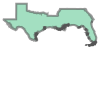

In [42]:
# create the hex grid, level 5
hexsize=5
union_poly=shapely.ops.unary_union(counties.geometry)
union_poly


In [57]:
polys=len(list(union_poly.geoms))
polys

205

In [50]:
# dictionary with list of all node coordinates
union_node_dict=shapely.geometry.mapping(union_poly)
union_node_dict

{'type': 'MultiPolygon',
 'coordinates': [(((-97.32997564590158, 27.547020186320896),
    (-97.33109865328252, 27.543801171231777),
    (-97.33291266539611, 27.53859914674329),
    (-97.33498667952018, 27.532655118600452),
    (-97.33695868882354, 27.529051100228425),
    (-97.33882570030623, 27.524482077902032),
    (-97.34099971328057, 27.519461053013448),
    (-97.34254472176121, 27.516299036945306),
    (-97.34473373129683, 27.51301401911469),
    (-97.34492174140213, 27.50860500013188),
    (-97.34749575695342, 27.50300197156724),
    (-97.34991275228961, 27.49121188731149),
    (-97.35026874492719, 27.486466850506826),
    (-97.3490807392791, 27.483831832745963),
    (-97.351100738257, 27.481828813591587),
    (-97.35054973231011, 27.47857478988746),
    (-97.35692472825157, 27.471917726802094),
    (-97.35858772299346, 27.467699691418314),
    (-97.35823171786507, 27.46485267041633),
    (-97.36143971005458, 27.45820961349737),
    (-97.36429270047357, 27.45082755159351),
    (-

In [53]:
for i in union_node_dict['coordinates']:
    for j in i:
        print(j)
    exit

((-97.32997564590158, 27.547020186320896), (-97.33109865328252, 27.543801171231777), (-97.33291266539611, 27.53859914674329), (-97.33498667952018, 27.532655118600452), (-97.33695868882354, 27.529051100228425), (-97.33882570030623, 27.524482077902032), (-97.34099971328057, 27.519461053013448), (-97.34254472176121, 27.516299036945306), (-97.34473373129683, 27.51301401911469), (-97.34492174140213, 27.50860500013188), (-97.34749575695342, 27.50300197156724), (-97.34991275228961, 27.49121188731149), (-97.35026874492719, 27.486466850506826), (-97.3490807392791, 27.483831832745963), (-97.351100738257, 27.481828813591587), (-97.35054973231011, 27.47857478988746), (-97.35692472825157, 27.471917726802094), (-97.35858772299346, 27.467699691418314), (-97.35823171786507, 27.46485267041633), (-97.36143971005458, 27.45820961349737), (-97.36429270047357, 27.45082755159351), (-97.36755869092666, 27.443328487933204), (-97.36726368652677, 27.440913470088233), (-97.3673816778295, 27.43574543041744), (-97.

In [51]:
union_node_dict['coordinates']=[[[j[1],j[0]] for j in i] for i in union_node_dict['coordinates']]
union_node_dict

NameError: name 'union_node_dict_temp' is not defined

In [45]:
hexgrid=h3.polyfill(union_poly,hexsize)
hexgrid

TypeError: Argument 'geojson' has incorrect type (expected dict, got MultiPolygon)

The hex layer reference inputs were calculated based on Spatial Join with the "Have their center in" match option.

https://pro.arcgis.com/en/pro-app/latest/tool-reference/analysis/spatial-join.htm
arcpy.analysis.SpatialJoin(target_features, join_features, out_feature_class, {join_operation}, {join_type}, {field_mapping}, {match_option}, {search_radius}, {distance_field_name}, {match_fields})

See also: "K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_Grid_tb_attrbts.docx" 

 ### Step 1. Adding state and county boundary fields

In [ ]:
# Step 1. Add state and county boundary fields to H3_5 grid, Spatial Join with "Have Their Center IN" option.

import arcpy
arcpy.analysis.SpatialJoin(
    target_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\H3_5",
    join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\tj_2021_us_st_cnt",
    out_feature_class=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping=r'GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,'
                  r'target_features,'
                  r'GRID_ID,0,17;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,'
                  r'target_features,'
                  r'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,'
                  r'target_features,'
                  r'Shape_Area,-1,-1;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,'
                  r'join_features,'
                  r'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,'
                  r'join_features,'
                  r'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,'
                  r'join_features,'
                  r'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,'
                  r'join_features,'
                  r'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,'
                  r'join_features,'
                  r'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,'
                  r'join_features,'
                  r'GEO_ID,0,5',
    match_option="HAVE_THEIR_CENTER_IN",
    search_radius=None,
    distance_field_name=""
)
# The DeleteField function is used to remove the extra fields created during the join.
arcpy.management.DeleteField(
    in_table= r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty",
    drop_field="Join_Count;TARGET_FID",
    method="DELETE_FIELDS"
)


<Result 'K:\\projects\\rgmg\\\\MSGeoProject\\Projects\\Grid_Effort\\H3_5_10_Grd.gdb\\Temp\\H3_5_St_Cnty'>

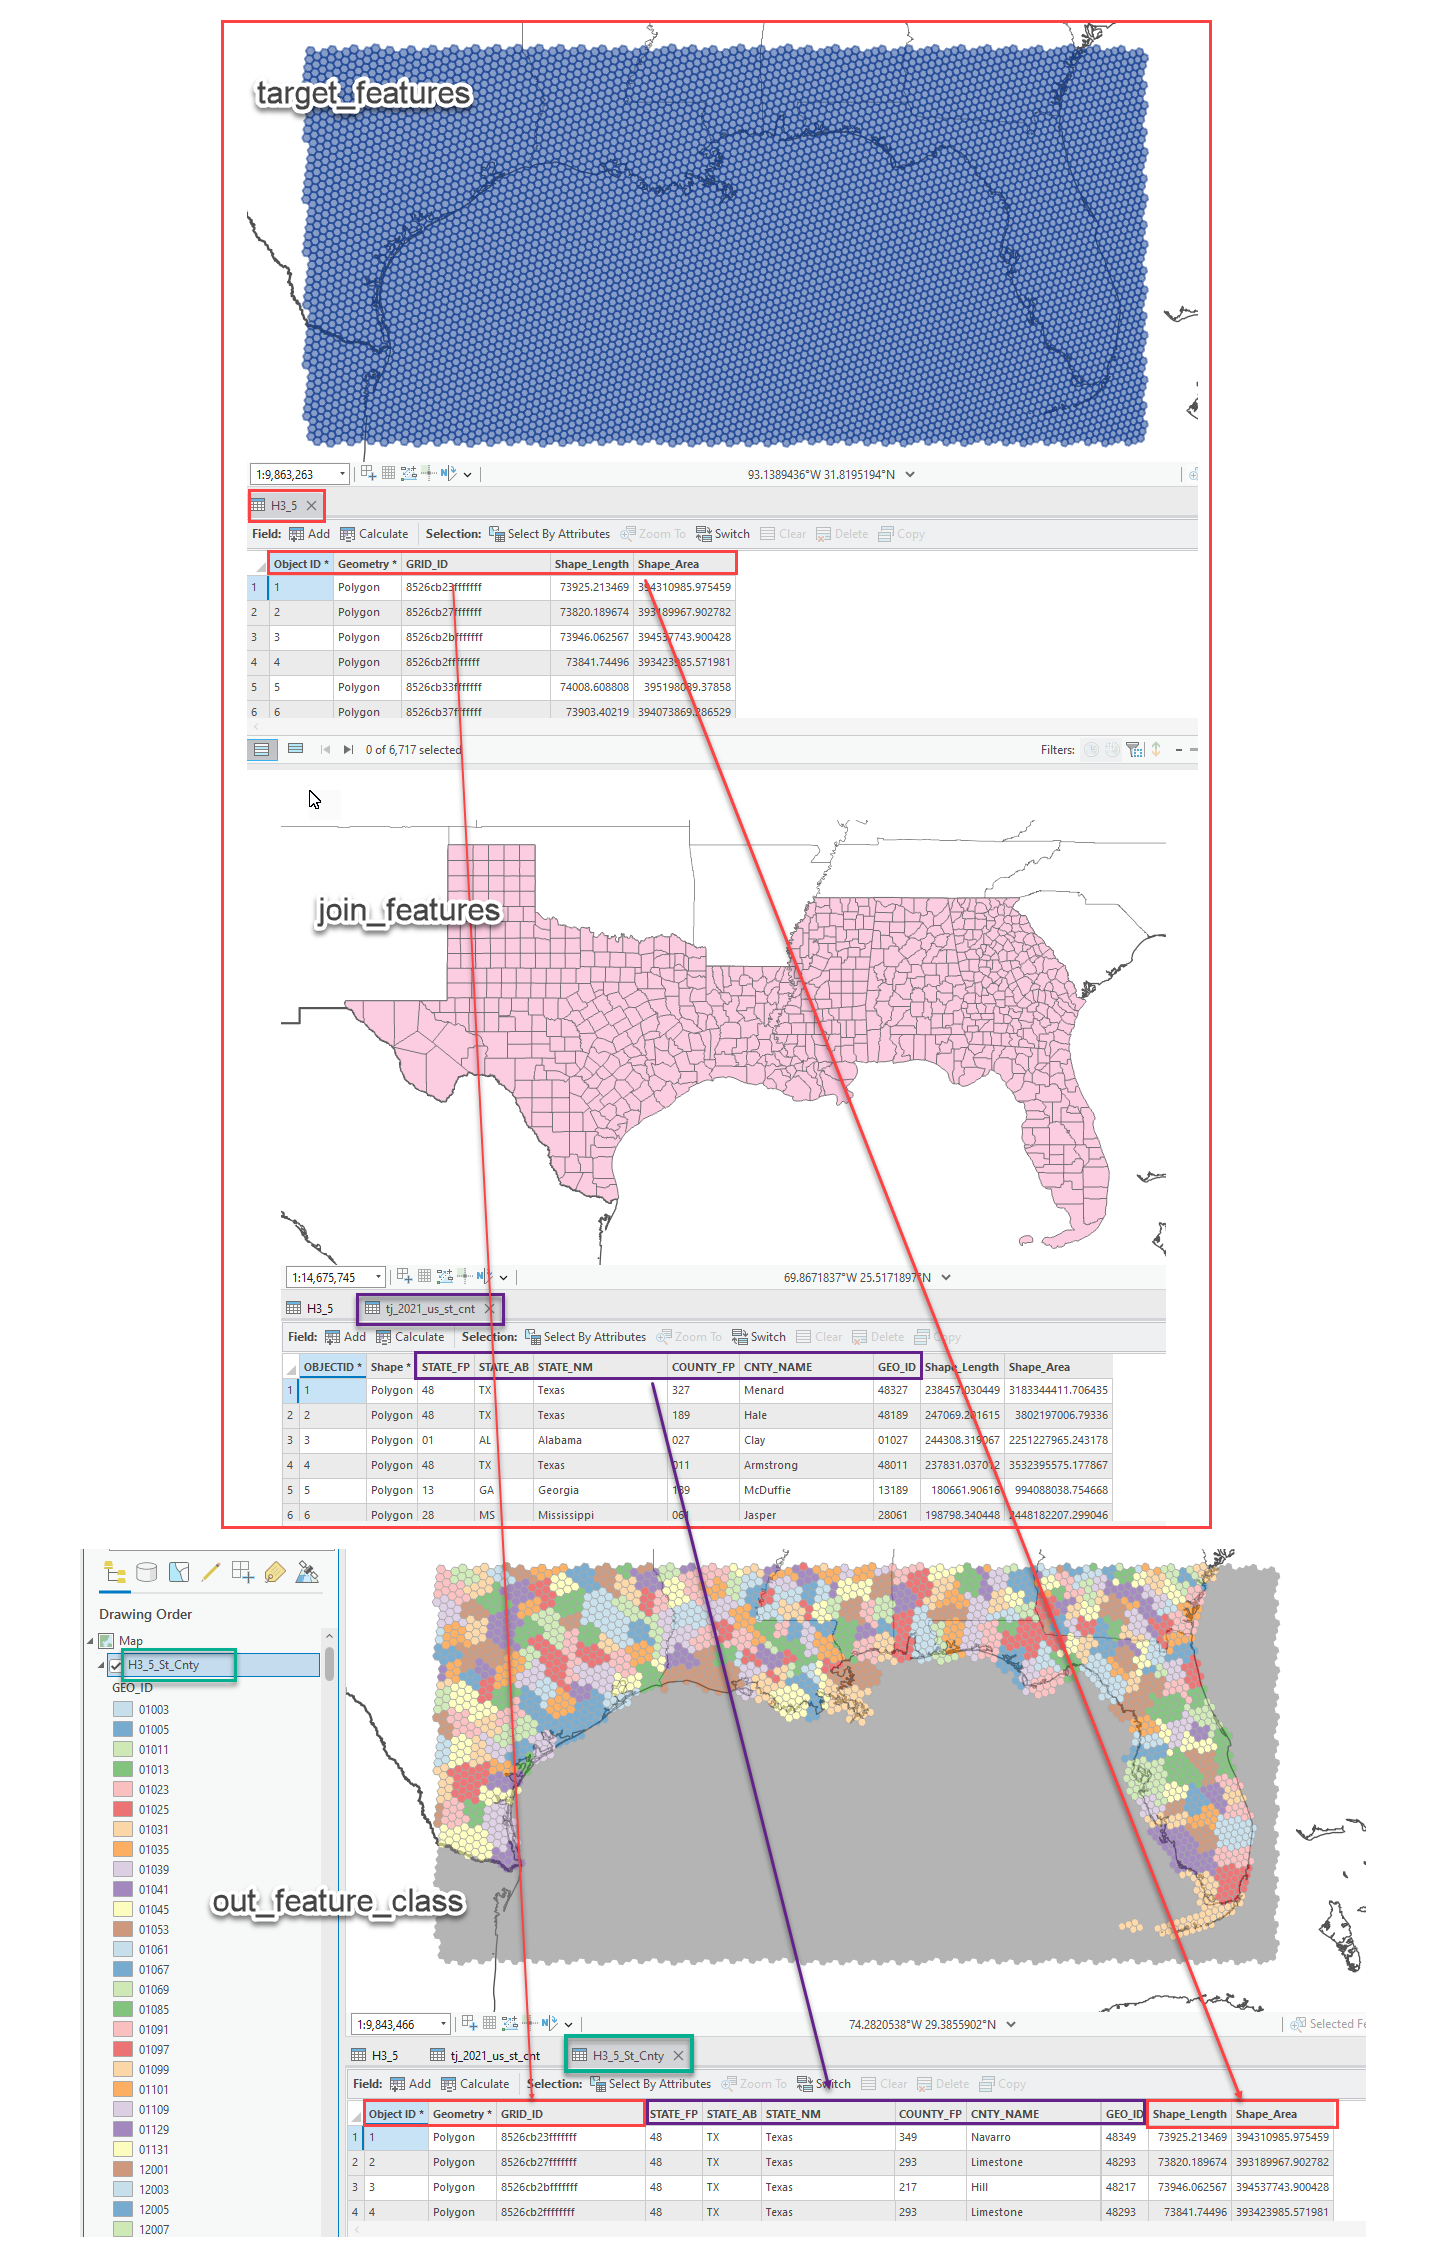

 ### Step 2. Adding estuarine drainage fields

In [ ]:
# Step 2. Add estuarine drainage area attributes; target_features file is the output from step 1. 


arcpy.analysis.SpatialJoin(
    target_features=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty",
    join_features= r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\Estuarine_Drainage_Areas",
    out_feature_class=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,H3_5_St_Cnty,'
                  'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,'
                  'target_features,STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,'
                  'target_features,STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,'
                  'target_features,STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,'
                  'target_features,COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,'
                  'target_features,CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,'
                  'target_features,GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,'
                  'join_features,EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,'
                  'join_features,EDA_NAME,0,100',
    match_option="HAVE_THEIR_CENTER_IN",
    search_radius=None,
    distance_field_name=""
)
# The DeleteField function is used to remove the extra fields created during the join.
arcpy.management.DeleteField(
    in_table=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA",
    drop_field="Join_Count;TARGET_FID",
    method="DELETE_FIELDS"
)

<Result 'K:\\projects\\rgmg\\\\MSGeoProject\\Projects\\Grid_Effort\\H3_5_10_Grd.gdb\\Temp\\H3_5_St_Cnty_EDA'>

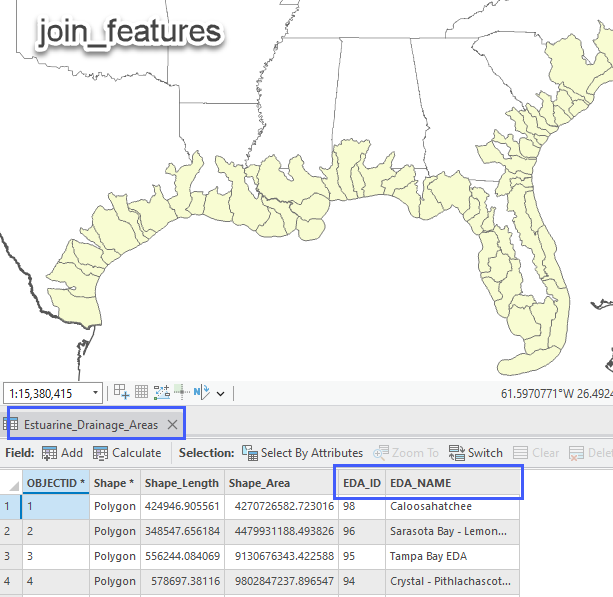

 ### Step 3. Adding 8-digit hydrologic unit codes

In [ ]:
# Step 3. Add 8-digit hydrologic unit codes; target_features file is the output from step 2.

arcpy.analysis.SpatialJoin(
    target_features=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA",
    join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\WBDHU8",
    out_feature_class=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,H3_5_St_Cnty_EDA,'
                  'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,target_features,'
                  'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,target_features,'
                  'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,target_features,'
                  'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,target_features,'
                  'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,target_features,'
                  'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,target_features,'
                  'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,target_features,'
                  'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,target_features,'
                  'EDA_NAME,0,100;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,target_features,'
                  'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,target_features,'
                  'Shape_Area,-1,-1;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,join_feature,HUC_8,0,8',
    match_option="HAVE_THEIR_CENTER_IN",
    search_radius=None,
    distance_field_name=""
)
# The DeleteField function is used to remove the extra fields created during the join.
arcpy.management.DeleteField(
    in_table=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8",
    drop_field="Join_Count;TARGET_FID",
    method="DELETE_FIELDS"
)

<Result 'K:\\projects\\rgmg\\\\MSGeoProject\\Projects\\Grid_Effort\\H3_5_10_Grd.gdb\\Temp\\H3_5_St_Cnty_EDA_WB8'>

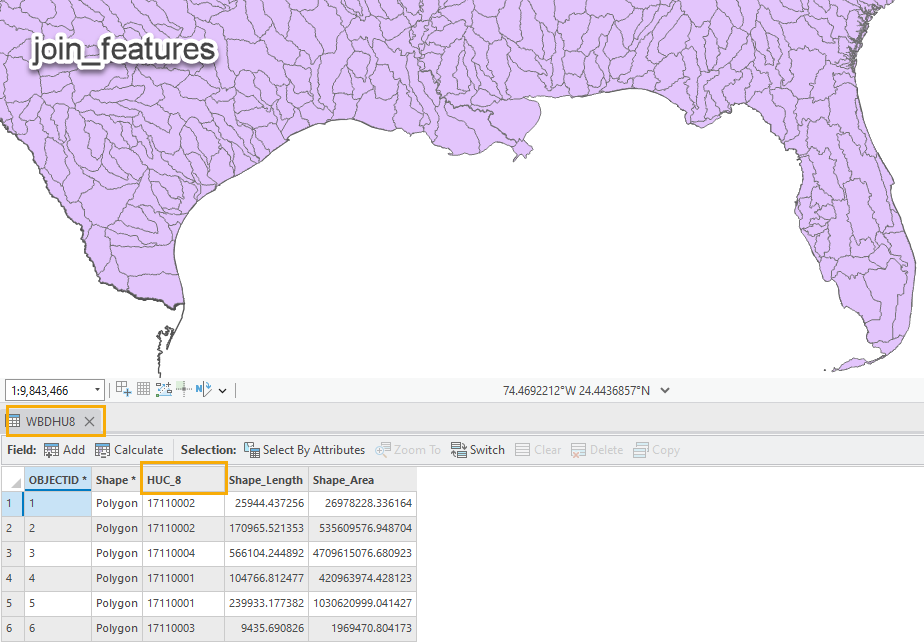

 ### Step 4. Adding 12-digit hydrologic unit codes

In [ ]:
# Step 4. Add 12-digit hydrologic unit codes; target_features file is the output from step 3.

arcpy.analysis.SpatialJoin(
    target_features=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8",
    join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\WBDHU12",
    out_feature_class=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,target_features,' 
                  'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,target_features,' 
                  'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,target_features,' 
                  'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,target_features,' 
                  'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,target_features,' 
                  'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,target_features,' 
                  'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,target_features,' 
                  'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,target_features,' 
                  'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,target_features,' 
                  'EDA_NAME,0,100;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,target_features,' 
                  'HUC_8,0,8;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,target_features,' 
                  'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,target_features,' 
                  'Shape_Area,-1,-1;HUC_12 "HUC_12" true true false 12 Text 0 0,First,#,join_features,HUC_12,0,12',
    match_option="HAVE_THEIR_CENTER_IN",
    search_radius=None,
    distance_field_name=""
)
# The DeleteField function is used to remove the extra fields created during the join.
arcpy.management.DeleteField(
    in_table=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12",
    drop_field="Join_Count;TARGET_FID",
    method="DELETE_FIELDS"
)

<Result 'K:\\projects\\rgmg\\MSGeoProject\\Projects\\Grid_Effort\\H3_5_10_Grd.gdb\\Temp\\H3_5_St_Cnty_EDA_WB8_WB12'>

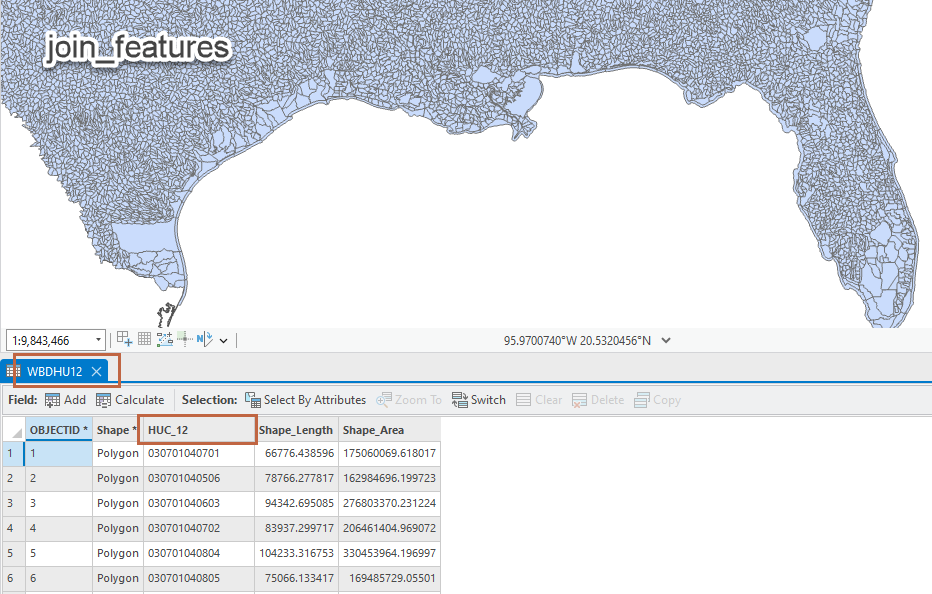

### Step 5. Adding land/water and population density information

In [ ]:
# Step 5. Add FIPS_Lnd_Wtr and POP_SQMI fields, target_features file is the output from step 4.
# This step calculates the population density and GEOID_Land (inside of the land area in the US counties)

arcpy.analysis.SpatialJoin(
    target_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12",
    join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\dtl_cnty_Census_ESRI",
    out_feature_class=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,target_features,'
                  'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,target_features,'
                  'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,target_features,'
                  'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,target_features,'
                  'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,target_features,'
                  'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,target_features,'
                  'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,target_features,'
                  'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,target_features,'
                  'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,target_features,'
                  'EDA_NAME,0,100;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,target_features,'
                  'HUC_8,0,8;HUC_12 "HUC_12" true true false 12 Text 0 0,First,#,target_features,'
                  'HUC_12,0,12;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,target_features,'
                  'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,target_features,'
                  'Shape_Area,-1,-1;POP_SQMI "POP_SQMI" true true false 8 Double 0 0,First,#,'
                  'join_features,POP_SQMI,-1,-1;FIPS_Lnd_Wtr "FIPS_Land_Wtr" true true false 15 Text 0 0,First,#,'
                  'join_features,FIPS_Lnd_Wtr,0,15',
    match_option="HAVE_THEIR_CENTER_IN",
    search_radius=None,
    distance_field_name=""
)
# The DeleteField function is used to remove the extra fields created during the join.
arcpy.management.DeleteField(
    in_table=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
    drop_field="Join_Count;TARGET_FID",
    method="DELETE_FIELDS"
)
# replace the null values for 'GEO_ID' and 'FIPS_Lnd_Wtr' fields with "" 
# the null values create problems for the field calculation operation 

path = r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr"

fieldNames = ['GEO_ID','FIPS_Lnd_Wtr']  
fieldCount = len(fieldNames)  

with arcpy.da.UpdateCursor(path, fieldNames) as curU:  
    for row in curU:  
        rowU = row  
        for field in range(fieldCount):  
            if rowU[field] == None:  
                rowU[field] = ""  
      
      
        curU.updateRow(rowU)

del curU

# The CalculateField function is used to complete the 'FIPS_Lnd_Wtr' field
# The attributes "GEOID_Water" and "Water" are calculated based on the already existing GEO_ID and FIPS_Lnd_Wtr attributes
arcpy.management.CalculateField(
    in_table=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
    field="FIPS_Lnd_Wtr",
    expression="attr(!GEO_ID!, !FIPS_Lnd_Wtr!)",
    expression_type="PYTHON3",
    code_block="""def attr(GEO_ID, FIPS_Lnd_Wtr):
    if FIPS_Lnd_Wtr != "":
         return FIPS_Lnd_Wtr
    if FIPS_Lnd_Wtr == "" and GEO_ID != "":
        return GEO_ID + "_Water"
    if FIPS_Lnd_Wtr == "" and GEO_ID == "":
        return "Water" """,
    field_type="TEXT",
    enforce_domains="NO_ENFORCE_DOMAINS"
)

<Result 'K:\\projects\\rgmg\\MSGeoProject\\Projects\\Grid_Effort\\H3_5_10_Grd.gdb\\Temp\\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr'>

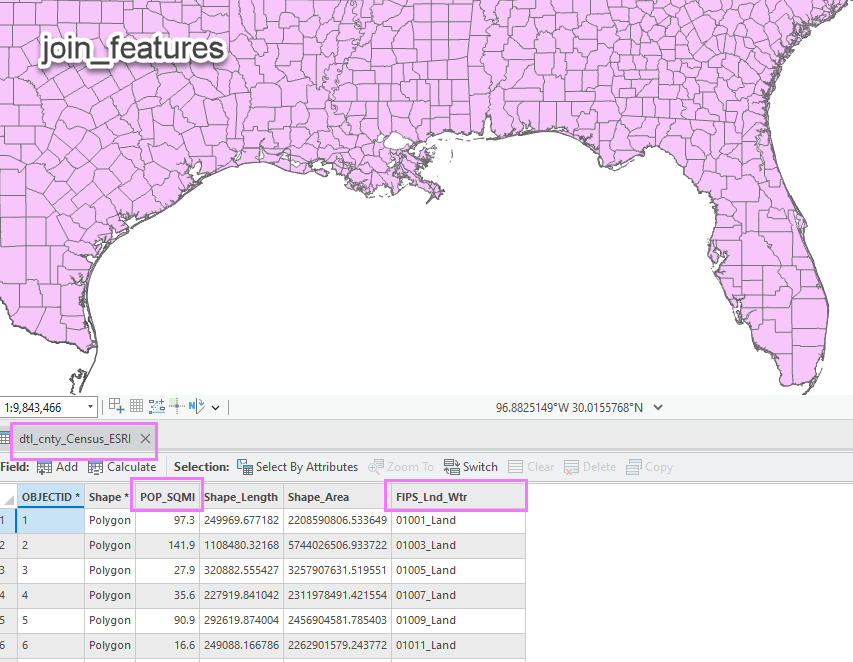

### Step 6. Replacing the null values with "" (for the text fields) and -999 (for the population density field). Exporting the final output layer

In [ ]:
# replace the "null" values for text fields with "" 
path = r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr"

fieldTxt = ['STATE_FP','STATE_AB','STATE_NM','COUNTY_FP', 'CNTY_NAME', 'EDA_ID', 'EDA_NAME', 'HUC_8', 'HUC_12', 'FIPS_Lnd_Wtr'] 
fieldTxtCount = len(fieldTxt)  

with arcpy.da.UpdateCursor(path, fieldTxt) as curU:  
    for row in curU:  
        rowU = row  
        for field in range(fieldTxtCount):  
            if rowU[field] == None:  
                rowU[field] = ""  
      
      
        curU.updateRow(rowU)

del curU

# replace the "null" values for the POP_SQMI field with -999
fieldDb = ['POP_SQMI']  
fieldDbCount = len(fieldDb)  

with arcpy.da.UpdateCursor(path, fieldDb) as curU:  
    for row in curU:  
        rowU = row  
        for field in range(fieldDbCount):  
            if rowU[field] == None:  
                rowU[field] = -999  
      
      
        curU.updateRow(rowU)

del curU

# export the H3 layer with reference attributes to the permanent feature dataset
arcpy.conversion.ExportFeatures(
    in_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
    out_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\H3_Grds_Reference_Flds\H3_5_ref_flds",
    where_clause="",
    use_field_alias_as_name="NOT_USE_ALIAS",
    field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#, in_features,'
                  'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,in_features,'
                  'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,in_features,'
                  'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,in_features,'
                  'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,in_features,'
                  'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,in_features,'
                  'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,in_features,'
                  'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,in_features,'
                  'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,in_features,'
                  'EDA_NAME,0,100;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,in_features,'
                  'HUC_8,0,8;HUC_12 "HUC_12" true true false 12 Text 0 0,First,#,in_features,'
                  'HUC_12,0,12;POP_SQMI "POP_SQMI" true true false 8 Double 0 0,First,#,in_features,'
                  'POP_SQMI,-1,-1;FIPS_Lnd_Wtr "FIPS_Land_Wtr" true true false 15 Text 0 0,First,#,in_features,'
                  'FIPS_Lnd_Wtr,0,15;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,in_features,'
                  'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,in_features,Shape_Area,-1,-1',
    sort_field=None
)


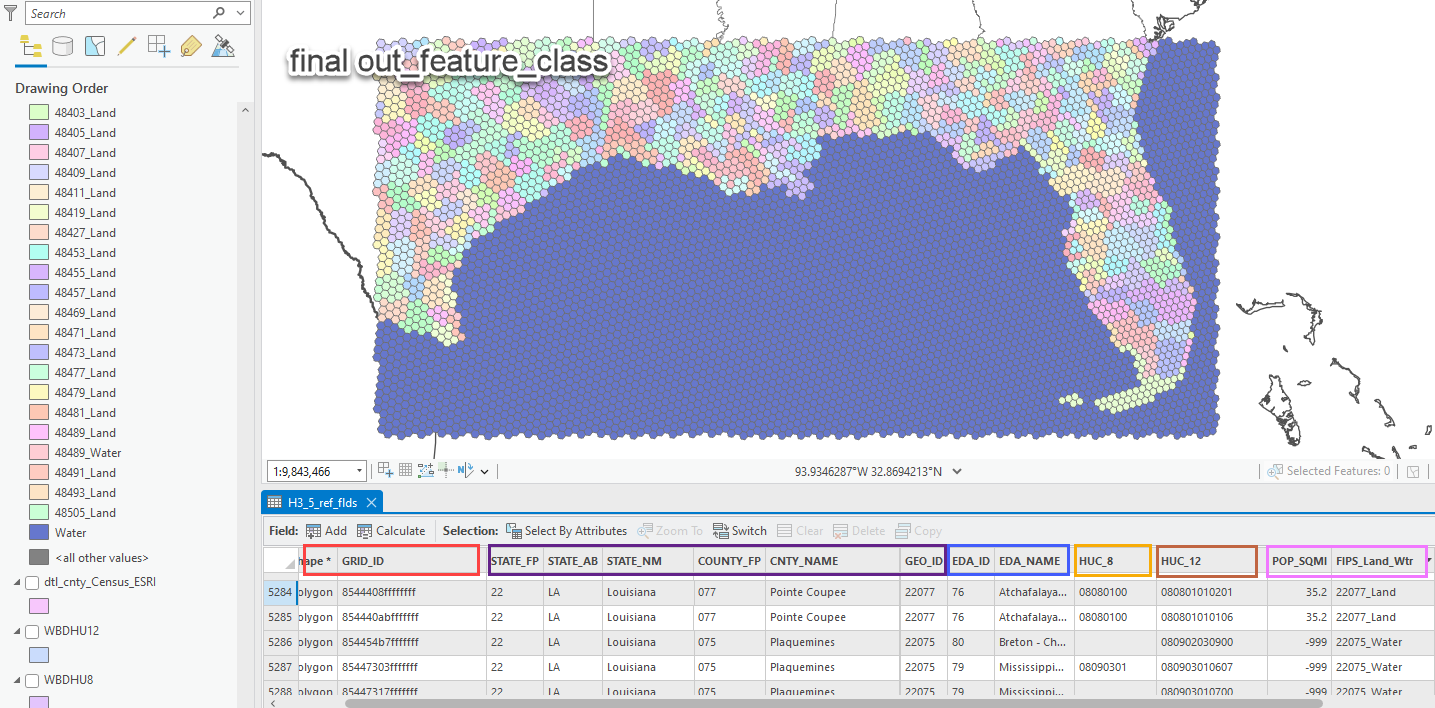